In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from hvplot import hvPlot
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

In [ ]:
raw_dataset = pd.read_csv('../data/okcupid.csv') # The original dataset also had essays, we already deleted them
data = raw_dataset.drop(columns="Unnamed: 0") # This column has been introduced by mistake when we removed the essays 

data.head(5)

## Missing Values

In [14]:
data.isna().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'status'),
  Text(2, 0, 'sex'),
  Text(3, 0, 'orientation'),
  Text(4, 0, 'body_type'),
  Text(5, 0, 'diet'),
  Text(6, 0, 'drinks'),
  Text(7, 0, 'drugs'),
  Text(8, 0, 'education'),
  Text(9, 0, 'ethnicity'),
  Text(10, 0, 'height'),
  Text(11, 0, 'income'),
  Text(12, 0, 'job'),
  Text(13, 0, 'last_online'),
  Text(14, 0, 'location'),
  Text(15, 0, 'offspring'),
  Text(16, 0, 'pets'),
  Text(17, 0, 'religion'),
  Text(18, 0, 'sign'),
  Text(19, 0, 'smokes'),
  Text(20, 0, 'speaks')])

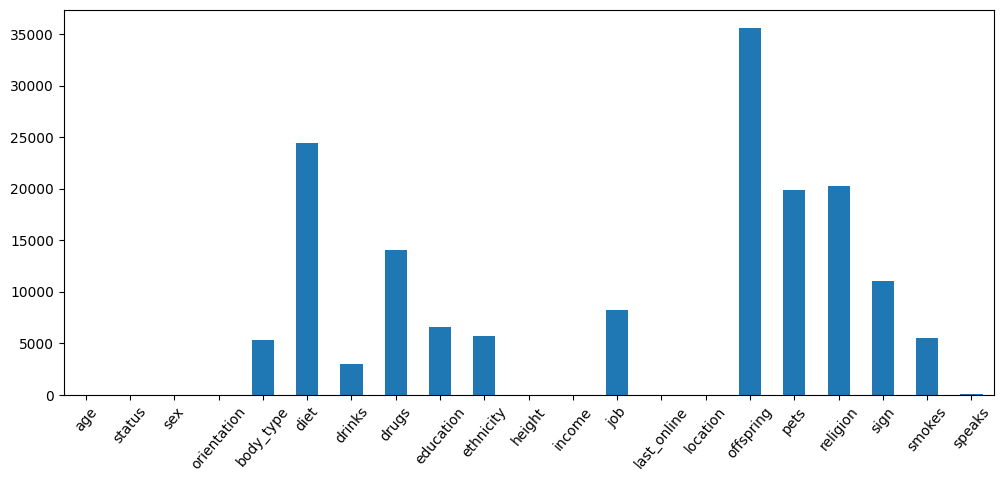

In [16]:
plt.figure(figsize = (12, 5))

data.isna().sum().plot(kind = "bar")
plt.xticks(rotation = 50)

## General Statistics and Data Types

In [17]:
data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


 On average the age of profile's is 32 years old, with the income around 20 000$ (but it deviates a lot, so we can't really say that 



In [18]:
data.corr().style.background_gradient()

,age,height,income
age,1.000000,-0.022262,-0.001004
height,-0.022262,1.000000,0.065049
income,-0.001004,0.065049,1.000000


No significant correlation between age, height and income

## 1. Age


In [19]:
data.hvplot.hist("age")

:Histogram   [age]   (age_count)

In [20]:
df = (data.groupby("age")[["sex"]].count())

df["% of participants"] = (df["sex"] / df["sex"].sum()) * 100

df = df.rename(columns = {"sex":"number of participants"})
df.hvplot.bar(x = 'age', y = 'number of participants', rot = 90)

:Bars   [age]   (number of participants)

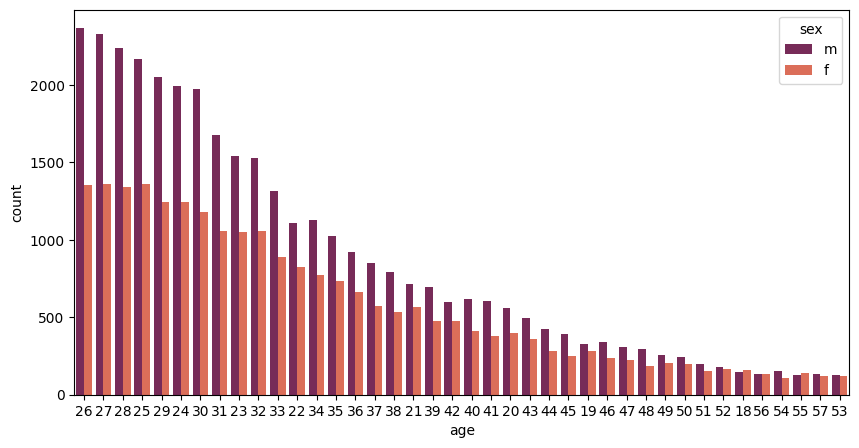

In [21]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'age', 
              data = data,
              hue = 'sex',
              palette = "rocket",
              order = data['age']
              .value_counts()
              .iloc[:40]
              .index);

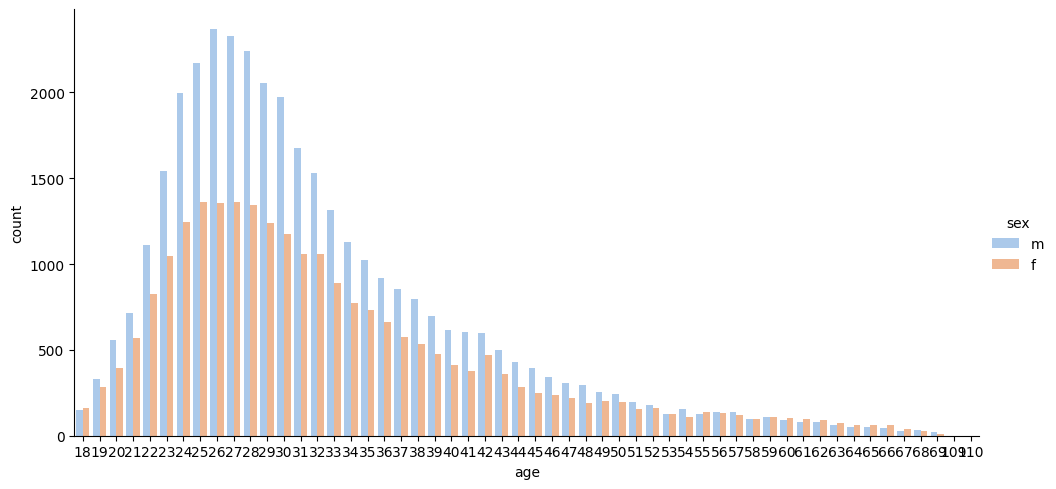

In [22]:
sns.catplot(x ='age', 
            data = data, 
            kind = 'count', 
            palette = 'pastel', 
            hue = 'sex', 
            height = 5, 
            aspect = 2)

## 2. Status

In [24]:
df = (data.groupby("status")[["sex"]].count())

df["% of participants"] = (df["sex"] / df["sex"].sum()) * 100

df = df.rename(columns = {"sex":"number of participants"})

df

,number of participants,% of participants
status,,
available,1865,3.111133
married,310,0.517132
seeing someone,2064,3.443099
single,55697,92.911954
unknown,10,0.016682


In [25]:
df.hvplot.bar(x = 'status', 
              y = 'number of participants', 
              rot = 90)

:Bars   [status]   (number of participants)

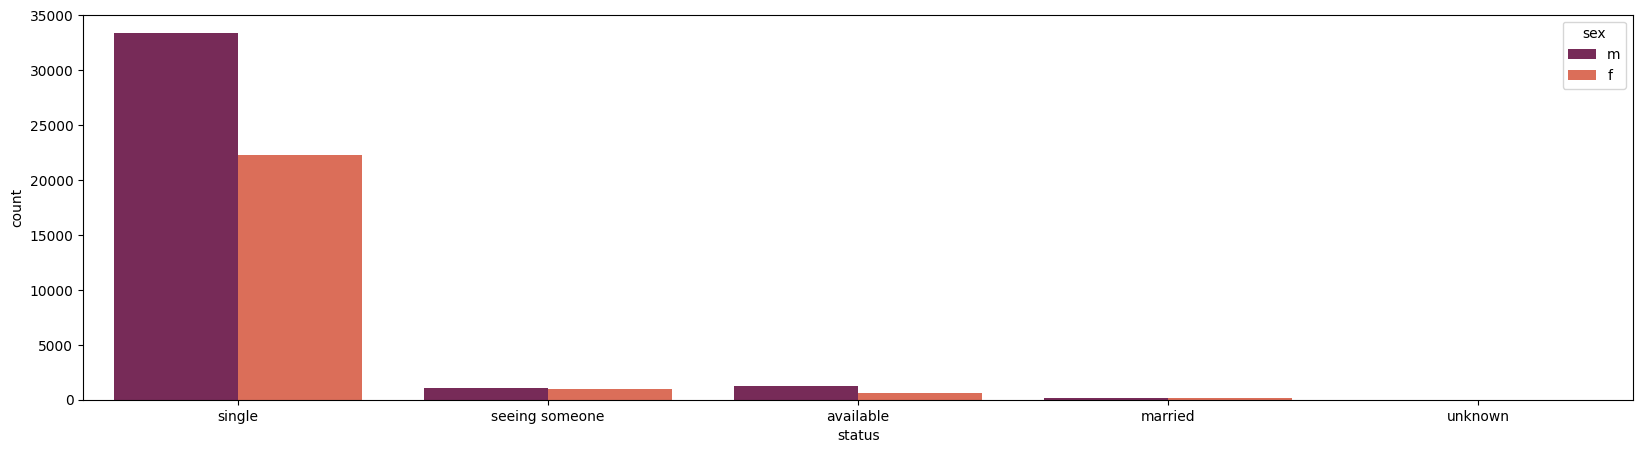

In [27]:
plt.figure(figsize = (20, 5))

sns.countplot(x = 'status', 
              data = data,
              hue = 'sex',
              palette = "rocket",
              order = data['status']
              .value_counts()
              .iloc[:40]
              .index);

## 3. Orientation

In [28]:
df = (data
      .groupby("orientation")[["sex"]]
      .count()
      .sort_values(by = "sex", ascending = False))

df["% of participants"] = (df["sex"] / df["sex"].sum()) * 100

df = df.rename(columns = {"sex":"number of participants"})

df

,number of participants,% of participants
orientation,,
straight,51606,86.087479
gay,5573,9.296700
bisexual,2767,4.615821


In [29]:
df.hvplot.bar(x = 'orientation', 
              y = 'number of participants', 
              rot = 90)

:Bars   [orientation]   (number of participants)

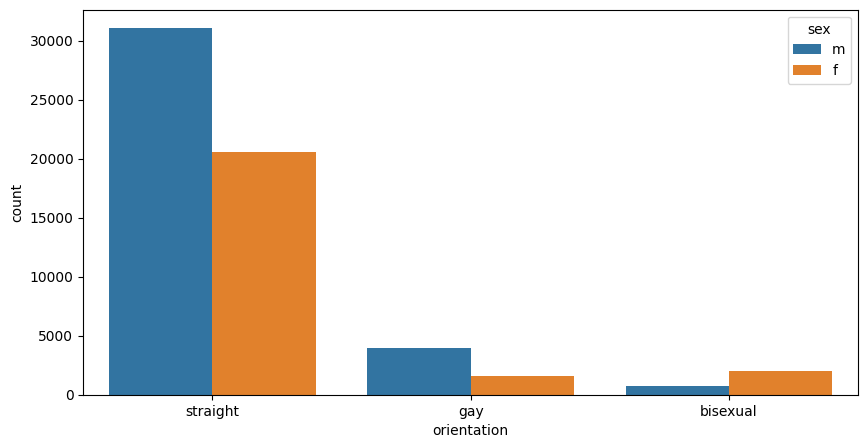

In [30]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'orientation', 
              data = data,
              hue = 'sex',
              order = data['orientation']
              .value_counts()
              .iloc[:10]
              .index);

In [31]:
data['orientation'].value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

## 4. Body Type

In [36]:
df = (data.groupby("body_type")[["sex"]].count().sort_values(by = "sex", ascending = False))

df["% of participants"] = (df["sex"] / df["sex"].sum()) * 100

df = df.rename(columns = {"sex":"number of participants"})

df

,number of participants,% of participants
body_type,,
average,14652,26.810613
fit,12711,23.258920
athletic,11819,21.626715
thin,4711,8.620311
curvy,3924,7.180238
a little extra,2629,4.810613
skinny,1777,3.251601
full figured,1009,1.846295
overweight,444,0.812443


In [38]:
df.hvplot.bar(x = 'body_type', 
              y = 'number of participants', 
              rot = 90)

:Bars   [body_type]   (number of participants)

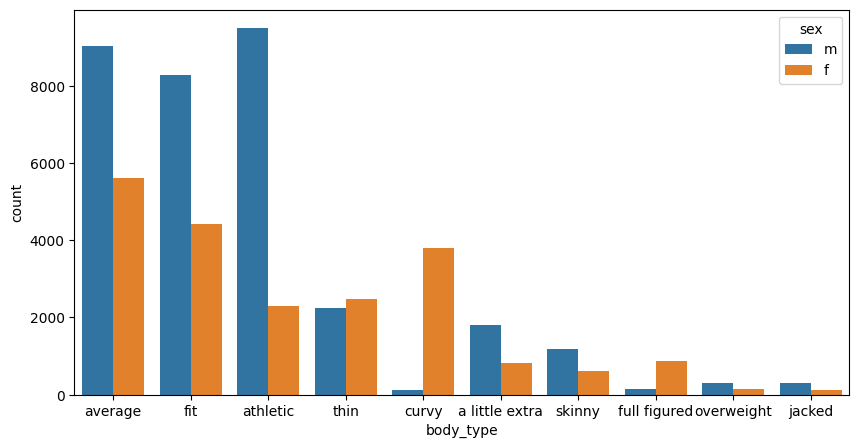

In [41]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'body_type', 
              data = data,
              hue = 'sex',
              order = data['body_type']
              .value_counts()
              .iloc[:10]
              .index);

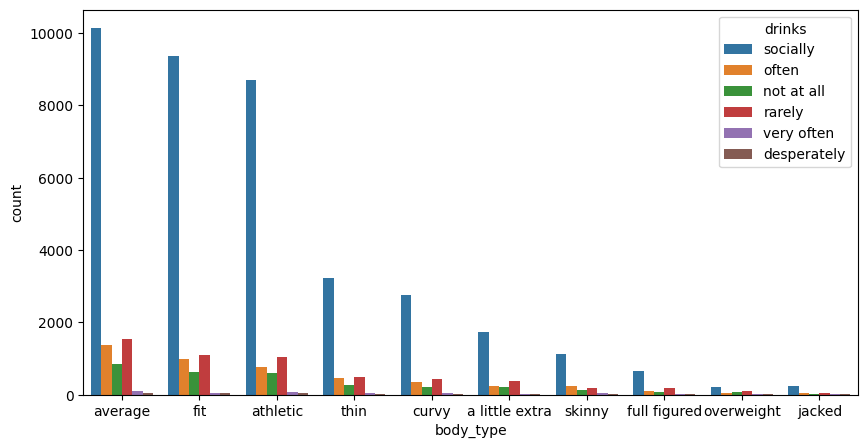

In [42]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'body_type', 
              data = data,
              hue = 'drinks',
              order = data['body_type']
              .value_counts()
              .iloc[:10]
              .index);

## 5. Diet

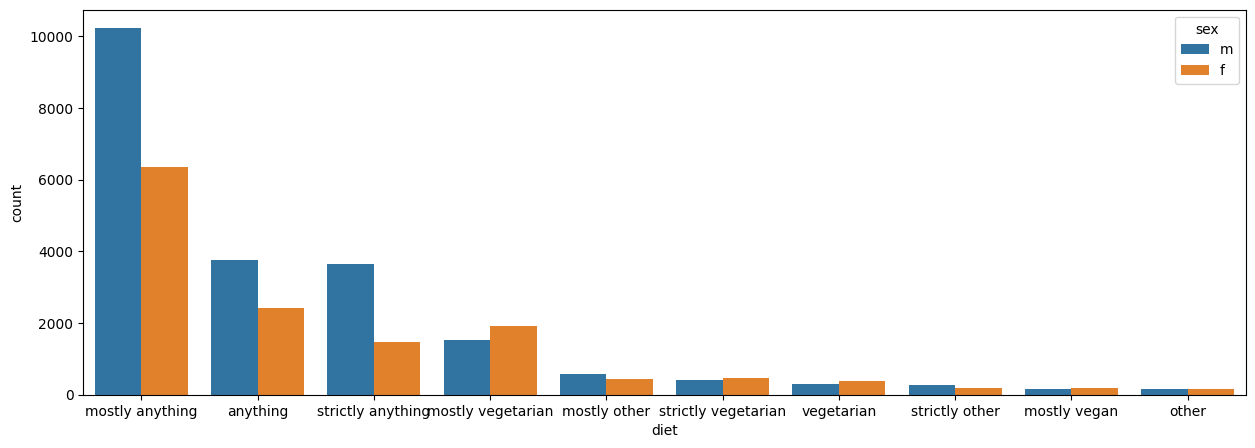

In [44]:
plt.figure(figsize = (15, 5))

sns.countplot(x = 'diet', 
              data = data,
              hue = 'sex',
              order = data['diet']
              .value_counts()
              .iloc[:10]
              .index);

## 6. Drinks

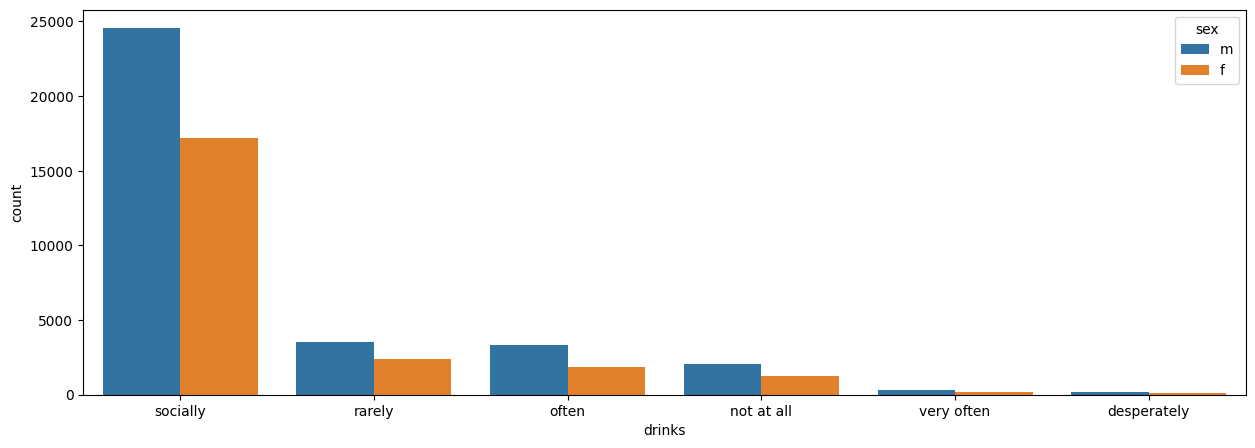

In [46]:
plt.figure(figsize = (15, 5))

sns.countplot(x = 'drinks', 
              data = data,
              hue = 'sex',
              order = data['drinks']
              .value_counts()
              .iloc[:10]
              .index);

## 8. Drugs

In [48]:
df = (data
      .groupby("drugs")[["sex"]]
      .count()
      .sort_values(by = "sex", ascending = False))

df["% of participants"] = (df["sex"] / df["sex"].sum()) * 100

df = df.rename(columns = {"sex":"number of participants"})

df.hvplot.bar(x = 'drugs', 
              y ='number of participants', 
              rot = 90)

:Bars   [drugs]   (number of participants)

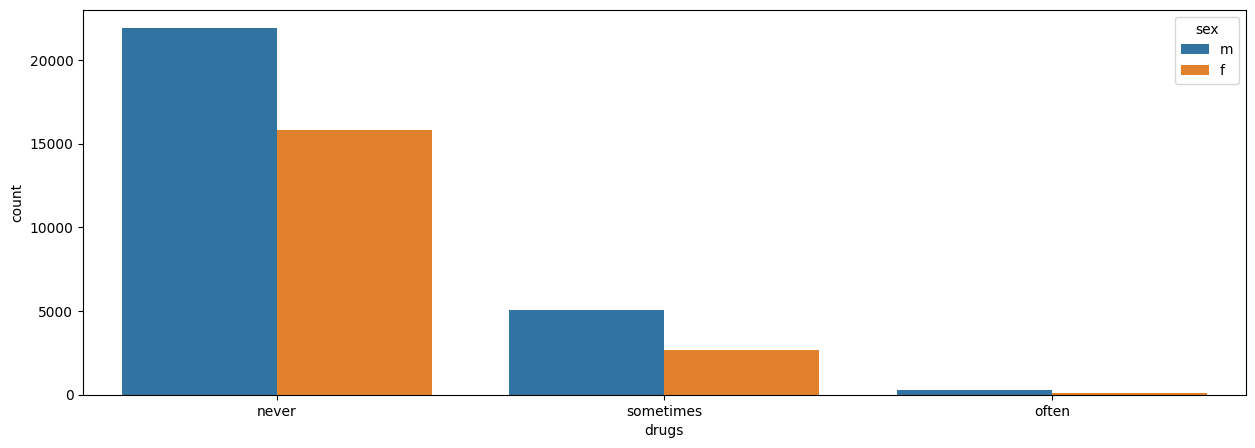

In [50]:
plt.figure(figsize = (15, 5))

sns.countplot(x = 'drugs', 
              data = data, 
              hue = 'sex', 
              order = data['drugs']
              .value_counts()
              .iloc[:10]
              .index);

## Income

In [ ]:
plt.figure(figsize=(15, 5))

sns.set_theme(style="whitegrid")

sns.boxenplot(x="income", y="age",
              data=data);

In [ ]:
mask=data["income"]!=0
df=(data[mask]
 .groupby("income")
    [["sex", "Total Words"]]
 .count()
)

df=df.rename(columns= {"sex":"number of participants"})
#df.hvplot.bar(x='age', y='number of participants', rot=90)
df

In [ ]:
df.hvplot.bar(x='income', y='Total Words', rot=90)


## 9. Education

In [ ]:
df=(data
 .groupby("education")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df.hvplot.bar(x='education', y='number of participants', rot=45)

## 10. Ethnicity

In [ ]:
df=(data
 .groupby("ethnicity")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(y='ethnicity', data=data, hue="sex",
palette='Reds',
order = data['ethnicity'].value_counts().iloc[:10].index)
plt.show()

## 11. Height

In [ ]:
df=(data
 .groupby("height")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
df["% of participants"]=(df["sex"]/df["sex"].sum())*100
df=df.rename(columns= {"sex":"number of participants"})
df.hvplot.bar(x='height', y='number of participants', rot=45)


In [ ]:
data["height"].describe()

## 12. Gender

In [ ]:
df=(data
 .groupby("sex")
 [["age"]]
 .count()
)
df["% of participants, sex"]=(df["age"]/df["age"].sum())*100
df

In [ ]:
(data
 .groupby("sex")
 [["age"]]
 .count()
)


 We have 59 946 participants. 59% of them are men and 40% are women

## 13. Pets

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(y = 'pets', data=data,
hue='sex', palette='flare',
order=data['pets'].value_counts().iloc[:].index)
plt.show()

## Q2: Words in the profile


## 1. Passion

In [ ]:
passion=data[data["profile text"].str.contains("passion")]

df_p=(passion
.groupby("sex")
 [["sex"]]
 .count()
)

df_p["%"]=(df_p["sex"]/df_p["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_p

In [ ]:
len(passion)

## 2. Love

In [ ]:
love=data[data["profile text"].str.contains("love")]

df_l=(love
.groupby("sex")
 [["sex"]]
 .count()
)

df_l["%"]=(df_l["sex"]/df_l["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_l

## 3. Relationship

In [ ]:
rel=data[data["profile text"].str.contains("relationship")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

## 4. Serious Relationship

In [ ]:
rel=data[data["profile text"].str.contains("serious relationship")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

## 5. Hookups

In [ ]:
rel=data[data["profile text"].str.contains("hook*")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

## 6. Marriage

In [ ]:
rel=data[data["profile text"].str.contains("marriage")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

## 7. Ons 

In [ ]:
rel=data[data["profile text"].str.contains("ons")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r